In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [51]:
df = pd.read_csv(r'C:\Users\Sanskruti Diyewar\OneDrive\Desktop\Project Data Analyis\Data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,...,1,1,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,4807-IZYOZ,0,0,0,0,51,1,0,0,2,...,2,2,2,2,2,0,0,20.65,1020.75,0
7007,2234-XADUH,0,0,1,1,72,1,1,2,0,...,1,0,1,1,1,1,1,103.20,7362.90,0
7008,4801-JZAZL,0,0,1,1,11,0,0,1,1,...,0,0,0,0,0,1,2,29.60,346.45,0
7009,8361-LTMKD,1,1,1,0,4,1,1,2,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [52]:
print(df.shape)
#print(df.describe())
print(df.head(5))

(7011, 21)
   customerID  gender  SeniorCitizen  Partner  Dependents  Tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                1               0  ...   
1             1              0                1               1  ...   
2             1              0                1               1  ...   
3             0              0                1               1  ...   
4             1              0                2               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0   

In [53]:
# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Encode the target variable
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# Split data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Label Encoding for Binary Variables
# One-Hot Encoding for Categorical Variables
# Convert TotalCharges to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Label Encoding for binary variables
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
label_encoders = {}
for column in binary_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# One-Hot Encoding for categorical variables
categorical_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=categorical_columns)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_2,Contract_0,Contract_1,Contract_2,PaymentMethod_0,PaymentMethod_1,PaymentMethod_2,PaymentMethod_3
0,5351,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,3943,1,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,2548,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,5509,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,6483,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [55]:
# Logistic Regression
# Select and Train Machine Learning Models
# Train Logistic Regression model

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate Logistic Regression model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_prec = precision_score(y_test, y_pred_log_reg)
log_reg_rec = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

print("Logistic Regression Performance:")
print(f"Accuracy: {log_reg_acc:.2f}")
print(f"Precision: {log_reg_prec:.2f}")
print(f"Recall: {log_reg_rec:.2f}")
print(f"F1 Score: {log_reg_f1:.2f}")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Performance:
Accuracy: 0.81
Precision: 0.69
Recall: 0.56
F1 Score: 0.62
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1270
           1       0.69      0.56      0.62       483

    accuracy                           0.81      1753
   macro avg       0.77      0.73      0.75      1753
weighted avg       0.80      0.81      0.80      1753



In [56]:
# Decision Tree
# Train Decision Tree model

dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dec_tree = dec_tree.predict(X_test)

# Evaluate Decision Tree model
dec_tree_acc = accuracy_score(y_test, y_pred_dec_tree)
dec_tree_prec = precision_score(y_test, y_pred_dec_tree)
dec_tree_rec = recall_score(y_test, y_pred_dec_tree)
dec_tree_f1 = f1_score(y_test, y_pred_dec_tree)

print("Decision Tree Performance:")
print(f"Accuracy: {dec_tree_acc:.2f}")
print(f"Precision: {dec_tree_prec:.2f}")
print(f"Recall: {dec_tree_rec:.2f}")
print(f"F1 Score: {dec_tree_f1:.2f}")
print(classification_report(y_test, y_pred_dec_tree))

Decision Tree Performance:
Accuracy: 0.73
Precision: 0.51
Recall: 0.52
F1 Score: 0.52
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1270
           1       0.51      0.52      0.52       483

    accuracy                           0.73      1753
   macro avg       0.67      0.67      0.67      1753
weighted avg       0.73      0.73      0.73      1753



In [57]:
# Random Forest
# Train Random Forest model

rand_forest = RandomForestClassifier(n_estimators=100, random_state=0)
rand_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rand_forest = rand_forest.predict(X_test)

# Evaluate Random Forest model
rand_forest_acc = accuracy_score(y_test, y_pred_rand_forest)
rand_forest_prec = precision_score(y_test, y_pred_rand_forest)
rand_forest_rec = recall_score(y_test, y_pred_rand_forest)
rand_forest_f1 = f1_score(y_test, y_pred_rand_forest)

print("Random Forest Performance:")
print(f"Accuracy: {rand_forest_acc:.2f}")
print(f"Precision: {rand_forest_prec:.2f}")
print(f"Recall: {rand_forest_rec:.2f}")
print(f"F1 Score: {rand_forest_f1:.2f}")
print(classification_report(y_test, y_pred_rand_forest))

Random Forest Performance:
Accuracy: 0.80
Precision: 0.68
Recall: 0.51
F1 Score: 0.59
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1270
           1       0.68      0.51      0.59       483

    accuracy                           0.80      1753
   macro avg       0.76      0.71      0.73      1753
weighted avg       0.79      0.80      0.79      1753



In [58]:
# compare model Performance
# Create a DataFrame to compare model performance
performance_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [log_reg_acc, dec_tree_acc, rand_forest_acc],
    'Precision': [log_reg_prec, dec_tree_prec, rand_forest_prec],
    'Recall': [log_reg_rec, dec_tree_rec, rand_forest_rec],
    'F1 Score': [log_reg_f1, dec_tree_f1, rand_forest_f1]
})

performance_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.809469,0.691517,0.556936,0.616972
1,Decision Tree,0.732459,0.514403,0.517598,0.515996
2,Random Forest,0.799772,0.681319,0.513458,0.585596


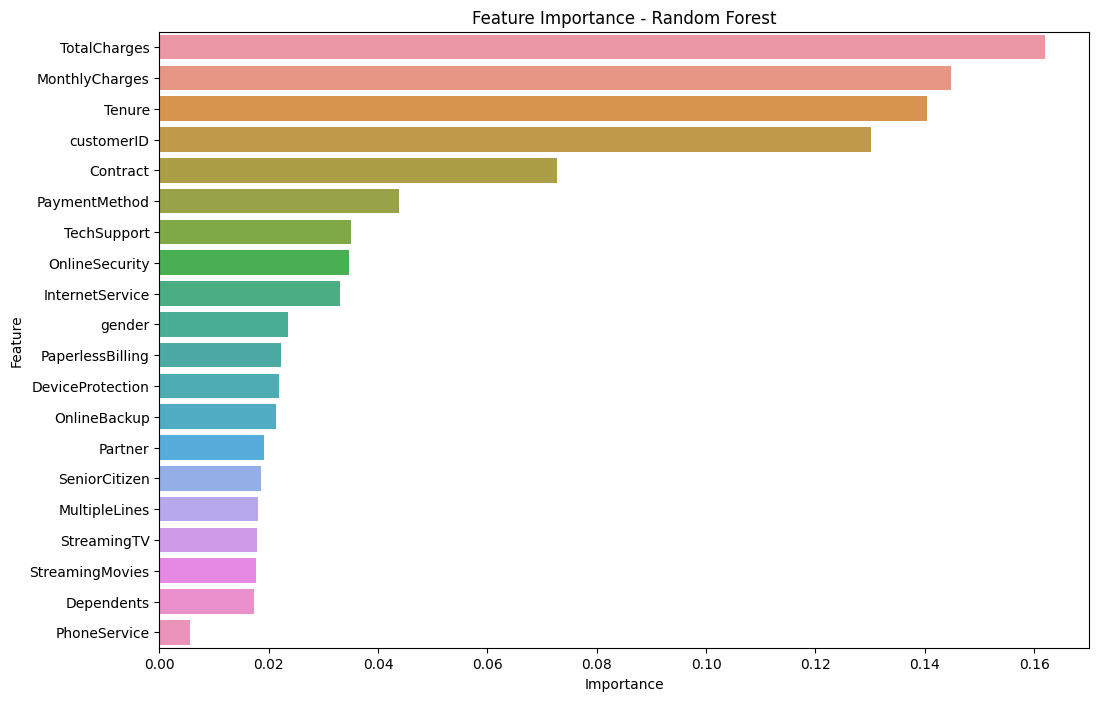

In [59]:
# Feature importance from Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rand_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance - Random Forest')
plt.show()